# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 9</font>

## Download: http://github.com/dsacademybr

## Exercício: Análise Exploratória de Dados com Python

Neste exercício, você vai realizar uma análise exploratória em um dos mais famosos datasets para Machine Learning, o dataset iris com informações sobre 3 tipos de plantas. Esse dataset é comumente usado em problemas de Machine Learning de classificação, quando nosso objetivo é prever a classe dos dados. No caso deste dataset, prever a categoria de uma planta a partir de medidas da planta (sepal e petal).

Em cada célula, você encontra a tarefa a ser realizada. Faça todo o exercício e depois compare com a solução proposta.

Dataset (já disponível com o Scikit-Learn): https://archive.ics.uci.edu/ml/datasets/iris

In [1]:
# Imports
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

fontsize = 14
ticklabelsize = 14

In [23]:
# Carregando o dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(len(df))
df.head()

150


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Extração e Transformação de Dados

In [24]:
# Imprima os valores numéricos da Variável target (o que queremos prever), 
# uma de 3 possíveis categorias de plantas: setosa, versicolor ou virginica
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [25]:
# Imprima os valores numéricos da Variável target (o que queremos prever), 
# uma de 3 possíveis categorias de plantas: 0, 1 ou 2
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
# Adicione ao dataset uma nova coluna com os nomes das espécies, pois é isso que vamos tentar prever (variável target)
df['specie name'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specie name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
# Inclua no dataset uma coluna com os valores numéricos da variável target
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specie name,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [28]:
# Extraia as features (atributos) do dataset e imprima 
df.columns[:4]

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [30]:
# Calcule a média de cada feature para as 3 classes
df.groupby('target').mean().T

target,0,1,2
sepal length (cm),5.006,5.936,6.588
sepal width (cm),3.418,2.770,2.974
petal length (cm),1.464,4.260,5.552
petal width (cm),0.244,1.326,2.026


## Exploração de Dados

In [9]:
# Imprima uma Transposta do dataset (transforme linhas e colunas e colunas em linhas)
df.T

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
sepal length (cm),5.1,4.9,4.7,4.6,5,5.4,4.6,5,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal width (cm),3.5,3,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3,2.5,3,3.4,3
petal length (cm),1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5,5.2,5.4,5.1
petal width (cm),0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2,2.3,1.8
specie,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
specie name,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,...,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica


In [10]:
# Utilize a função Info do dataset para obter um resumo sobre o dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
specie               150 non-null int32
specie name          150 non-null object
dtypes: float64(4), int32(1), object(1)
memory usage: 6.5+ KB


In [11]:
# Faça um resumo estatístico do dataset
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specie
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [31]:
# Verifique se existem valores nulos no dataset
df.isnull().sum(axis = 0)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
specie name          0
target               0
dtype: int64

In [35]:
# Faça uma contagem de valores de sepal length
df['sepal length (cm)'].value_counts(dropna=False)

5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
5.5     7
5.8     7
6.4     7
6.0     6
4.9     6
6.1     6
5.4     6
5.6     6
6.5     5
4.8     5
7.7     4
6.9     4
5.2     4
6.2     4
4.6     4
7.2     3
6.8     3
4.4     3
5.9     3
6.6     2
4.7     2
7.6     1
7.4     1
4.3     1
7.9     1
7.3     1
7.0     1
4.5     1
5.3     1
7.1     1
Name: sepal length (cm), dtype: int64

## Plot

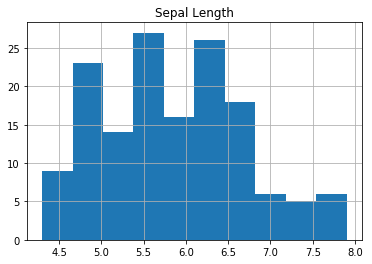

In [37]:
# Crie um Histograma de sepal length
plt.hist(df['sepal length (cm)'])
plt.grid(True)
plt.title('Sepal Length')
plt.show()

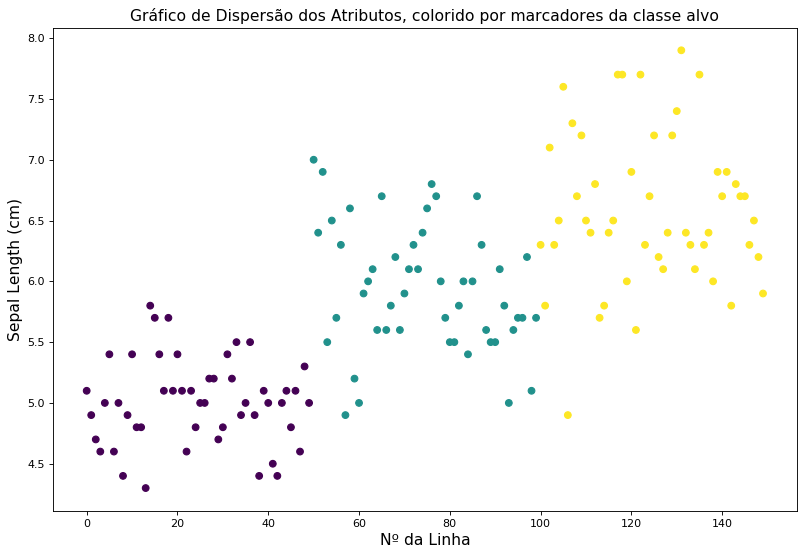

In [47]:
# Crie um Gráficos de Dispersão (scatter Plot) da variável sepal length versus número da linha, 
# colorido por marcadores da variável target
plt.figure(figsize = (12, 8), dpi = 80)
plt.scatter(range(len(df)), df['sepal length (cm)'], c=df['target']);
plt.xlabel('Nº da Linha', fontsize = fontsize)
plt.ylabel('Sepal Length (cm)', fontsize = fontsize)
plt.title('Gráfico de Dispersão dos Atributos, colorido por marcadores da classe alvo', fontsize = fontsize)
plt.show()

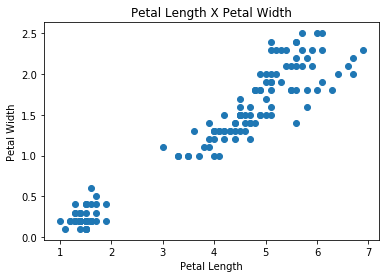

In [16]:
# Crie um Scatter Plot de 2 Features (atributos)
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length X Petal Width')
plt.show();

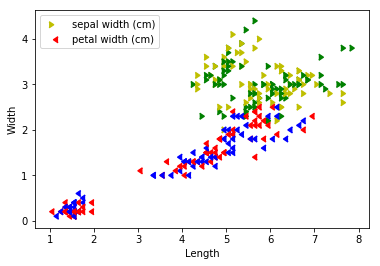

In [17]:
# Crie um Scatter Matrix das Features (atributos)
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], color = ['y', 'g'], marker = 5)
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], color = ['r', 'b'], marker = 4)
plt.legend()
plt.xlabel('Length')
plt.ylabel('Width')
plt.show();

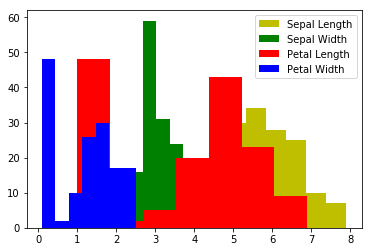

In [18]:
# Crie um Histograma de todas as features
bins = 7

plt.hist(df['sepal length (cm)'], color = 'y', label = 'Sepal Length', bins = bins)
plt.hist(df['sepal width (cm)'], color = 'g', label = 'Sepal Width', bins = bins)
plt.hist(df['petal length (cm)'], color = 'r', label = 'Petal Length', bins = bins)
plt.hist(df['petal width (cm)'], color = 'b', label = 'Petal Width', bins = bins)
plt.legend()
plt.show()

Conheça a Formação Cientista de Dados, um programa completo, 100% online e 100% em português, com 340 horas, mais de 1.200 aulas em vídeos e 26 projetos, que vão ajudá-lo a se tornar um dos profissionais mais cobiçados do mercado de análise de dados. Clique no link abaixo, faça sua inscrição, comece hoje mesmo e aumente sua empregabilidade:

https://www.datascienceacademy.com.br/pages/formacao-cientista-de-dados

# Fim

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>